In [1]:
import pandas as pd
import nltk

# Setup Data Structures
Take English letters and convert them to an individual set of characters indexed by their position.  In the current encoding 'a' = 1, 'b' = 2, and so forth.

In [3]:
str_letters = 'abcdefghijklmnopqrstuvwxyz'
vec_letters = list(str_letters)
df_letters = pd.DataFrame({'Letters':vec_letters})
df_letters['Index'] = df_letters.index+1
df_letters

,Letters,Index
0,a,1
1,b,2
2,c,3
3,d,4
4,e,5
5,f,6
6,g,7
7,h,8
8,i,9
9,j,10


This function takes a word as input, creates a temporary sum value set to 0, then iterates through each letter of the word to find its index value.  Since vectors are zero indexed in Python (i.e., they start at 0), a 1 is added to the value of the index value.  The assumption for this function is the letters were in the _vec_leters_ variable in the desired order.  If the current letter is not found in the vector/variable, then an error will be generated.  This error is caught by the _try_ and _except_ blocks, respectively.  At the end of the function, the temporary sum of letters by value is returned to the calling line.

In [4]:
def sum_word(str_word):
    tmp_sum = 0
    for i in str_word:
        try:
            tmp_sum = tmp_sum+vec_letters.index(i)+1
        except:
            pass
    return(tmp_sum)

In [5]:
sum_word('madelyn')

74

In [8]:
%%time
vec_sample = ['carson','marci','junior','bradley','madelyn','laurence','horace','nichol','bonnie','robert',
              'marissa','scott','kale','asher','sadie','hudson','harper','arminda','marian','alphonse','trey',
              'linda','ralph','sam','steven','greyson','maxine','alex','seth','edmundo','ashleigh','wendie','ninfa',
              'shona','lauralee','kalyn','louella','micheal','melonie','nancie']

vec_sums = []
for i in vec_sample:
    tmp_val = sum_word(i)
    vec_sums.append(tmp_val)

CPU times: user 104 µs, sys: 1 µs, total: 105 µs
Wall time: 108 µs


In [10]:
for i,item in enumerate(vec_sample):
    print(str(i)+': '+item+' = '+str(vec_sums[i]))

0: carson = 70
1: marci = 44
2: junior = 87
3: bradley = 67
4: madelyn = 74
5: laurence = 79
6: horace = 50
7: nichol = 61
8: bonnie = 59
9: robert = 78
10: marissa = 80
11: scott = 77
12: kale = 29
13: asher = 51
14: sadie = 38
15: hudson = 81
16: harper = 66
17: arminda = 60
18: marian = 56
19: alphonse = 90
20: trey = 68
21: linda = 40
22: ralph = 55
23: sam = 33
24: steven = 85
25: greyson = 103
26: maxine = 66
27: alex = 42
28: seth = 52
29: edmundo = 76
30: ashleigh = 69
31: wendie = 60
32: ninfa = 44
33: shona = 57
34: lauralee = 75
35: kalyn = 63
36: louella = 78
37: micheal = 51
38: melonie = 73
39: nancie = 46


# English Words
Using NLTK, take all of the English words and calculate their sum.

In [12]:
from nltk.corpus import words

<br>
Get all of the words from the NLTK resource.

In [14]:
vec_words = words.words()

<br>
Store all of the words in a dataframe, convert all words to lowercase, strip any whitespace, and calculate the number of letters in each word to store the length value in the dataframe.

In [15]:
%%time
df_words = pd.DataFrame({'Word':vec_words})
df_words['Word'] = df_words['Word'].str.lower()
df_words['Word'] = df_words['Word'].str.strip()
df_words['Len'] = df_words['Word'].apply(len)

CPU times: user 370 ms, sys: 21.3 ms, total: 391 ms
Wall time: 407 ms


In [17]:
print('Before Deduplication, Total Words = '+str(df_words.shape[0]))
df_words.drop_duplicates(subset=['Word'],inplace=True)
print('After Deduplication, Total Words = '+str(df_words.shape[0]))

Before Deduplication, Total Words = 236736
After Deduplication, Total Words = 234377


<br>
Apply the _sum_word_ function to every row of the Pandas dataframe, and store the calculated value in a new column.

In [18]:
%%time
df_words['Sum'] = df_words['Word'].apply(sum_word)

CPU times: user 915 ms, sys: 7.34 ms, total: 923 ms
Wall time: 926 ms


In [19]:
df_words.head()

,Word,Len,Sum
0,a,1,1
2,aa,2,2
3,aal,3,14
4,aalii,5,32
5,aam,3,15


# Questions
## Number 1:
How many words are there with a sum value of 100?

In [20]:
df_words_100 = df_words[df_words['Sum']==100].copy()
print('There are '+str(df_words_100.shape[0])+' words with a sum value of 100.')

There are 2295 words with a sum value of 100.


## Number 2:
What are the longest and shortest words (number of characters) with a sum value of 100?

In [33]:
len_100_min = df_words_100['Len'].min()
vec_words_100_min = df_words_100[df_words_100['Len']==len_100_min]['Word'].tolist()
print('The shortest words with a sum value of 100 have a length of '+str(len_100_min)+', these words are: '+', '.join(vec_words_100_min))

The shortest words with a sum value of 100 have a length of 5, these words are: buzzy, nutty, pussy, struv, totty, tousy


In [34]:
len_100_max = df_words_100['Len'].max()
vec_words_100_max = df_words_100[df_words_100['Len']==len_100_max]['Word'].tolist()
print('The shortest words with a sum value of 100 have a length of '+str(len_100_max)+', these words are: '+', '.join(vec_words_100_max))

The shortest words with a sum value of 100 have a length of 14, these words are: batrachoididae, biddulphiaceae


## Number 3:
What words have the highest sum value?

In [37]:
sum_all_max = df_words['Sum'].max()
vec_words_all_max = df_words[df_words['Sum']==sum_all_max]['Word'].tolist()
print('The words with the highest sum value has a sum of '+str(sum_all_max)+', these words are: '+', '.join(vec_words_all_max))

The words with the highest sum value has a sum of 328, these words are: dacryocystosyringotomy


## Number 4:
What is the minimum and maximum length values for the words?

In [46]:
print('Minimum Length = '+str(df_words['Len'].min())+'\nMaximum Length = '+str(df_words['Len'].max()))

Minimum Length = 1
Maximum Length = 24


## Number 5:
What do the kernel density estimate plots look like for the length and sum values of words?

In [38]:
%matplotlib inline

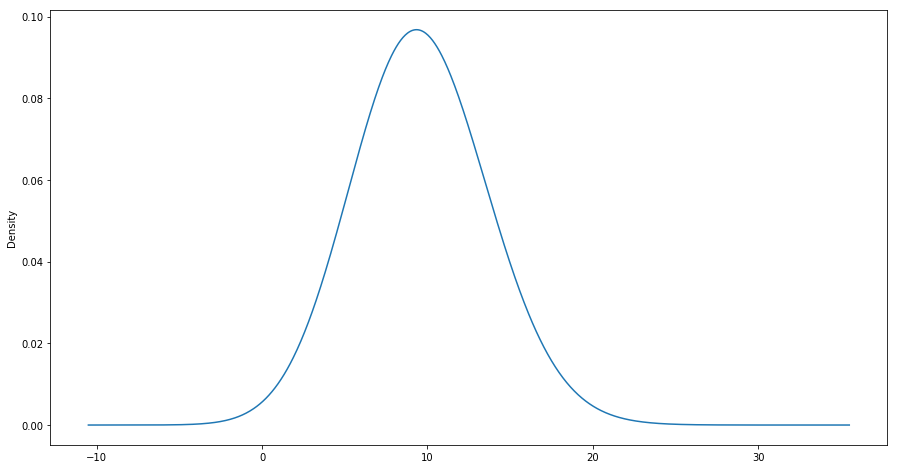

In [51]:
ax = df_words['Len'].plot.kde(bw_method=1,figsize=(15,8))

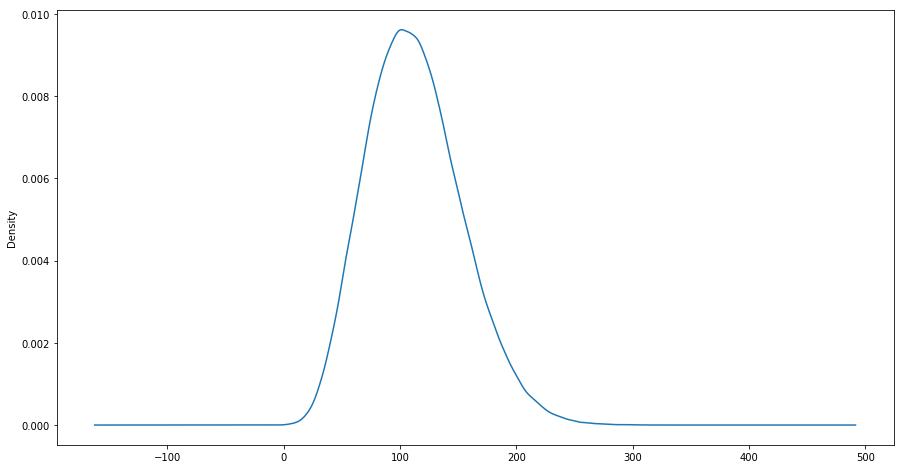

In [42]:
ax = df_words['Sum'].plot.kde(figsize=(15,8))

# Export

In [52]:
df_words_100.to_excel('./Words_Sum_100.xlsx',index=False)